In [1]:
import os
os.chdir("..")

from utils.callbacks import LearningRateScheduler, LearningRateGetvalue
from utils.optimizers import *
from utils.learning_rate import *
from utils.metrics import MeanIoU
from utils.loss_func import *
from utils.loss_function import *
from utils.losses import *
from utils.loss_segmentation import IoULoss, DiceLoss, TverskyLoss, FocalTverskyLoss, HybridLoss, FocalHybridLoss
from utils.helpers import *
from utils.data_generator import DatasetGenerator
from utils.utils import *

import configargparse
import matplotlib.pyplot as plt

In [2]:
input_training = r"C:\Users\pso9kor\Datasets\cityscapes\leftImg8bit_trainvaltest\leftImg8bit\train"
label_training = r"C:\Users\pso9kor\Datasets\cityscapes\gtFine_trainvaltest\gtFine\train"
max_samples_training = 10000
input_validation = r"C:\Users\pso9kor\Datasets\cityscapes\leftImg8bit_trainvaltest\leftImg8bit\val"
label_validation = r"C:\Users\pso9kor\Datasets\cityscapes\gtFine_trainvaltest\gtFine\val"
max_samples_validation = 2000
label_file = r"config\labels.py"
num_classes = 20
image_shape = [384, 384]
augment = True
shuffle = True
batch_size = 4
epochs = 10

In [3]:
# determine absolute filepaths
input_training   = abspath(input_training)
label_training   = abspath(label_training)
input_validation = abspath(input_validation)
label_validation = abspath(label_validation)

# get class names and class colors by parsing the labels py file
_, class_colors = get_labels(parse_convert_py(label_file))
assert num_classes == len(class_colors)

Number of classes -  20
unlabeled - [0, 0, 0]
road - [128, 64, 128]
sidewalk - [244, 35, 232]
building - [70, 70, 70]
wall - [102, 102, 156]
fence - [190, 153, 153]
pole - [153, 153, 153]
traffic light - [250, 170, 30]
traffic sign - [220, 220, 0]
vegetation - [107, 142, 35]
terrain - [152, 251, 152]
sky - [70, 130, 180]
person - [220, 20, 60]
rider - [255, 0, 0]
car - [0, 0, 142]
truck - [0, 0, 70]
bus - [0, 60, 100]
train - [0, 80, 100]
motorcycle - [0, 0, 230]
bicycle - [119, 11, 32]


In [4]:
# build data pipeline
# for training
trainGen = DatasetGenerator(data_path=(input_training, label_training),
                            max_samples=max_samples_training,
                            image_shape=image_shape,
                            augment=augment,
                            class_colors=class_colors,
                            shuffle=shuffle,
                            batch_size=batch_size,
                            epochs=epochs)
dataTrain, len_train, nbatch_train = trainGen()
print("Built data pipeline for {} training samples with {} batches per epoch".format(len_train, nbatch_train))

Built data pipeline for 2975 training samples with 743 batches per epoch


(384, 384, 3)
(384, 384, 20)


(None, None)

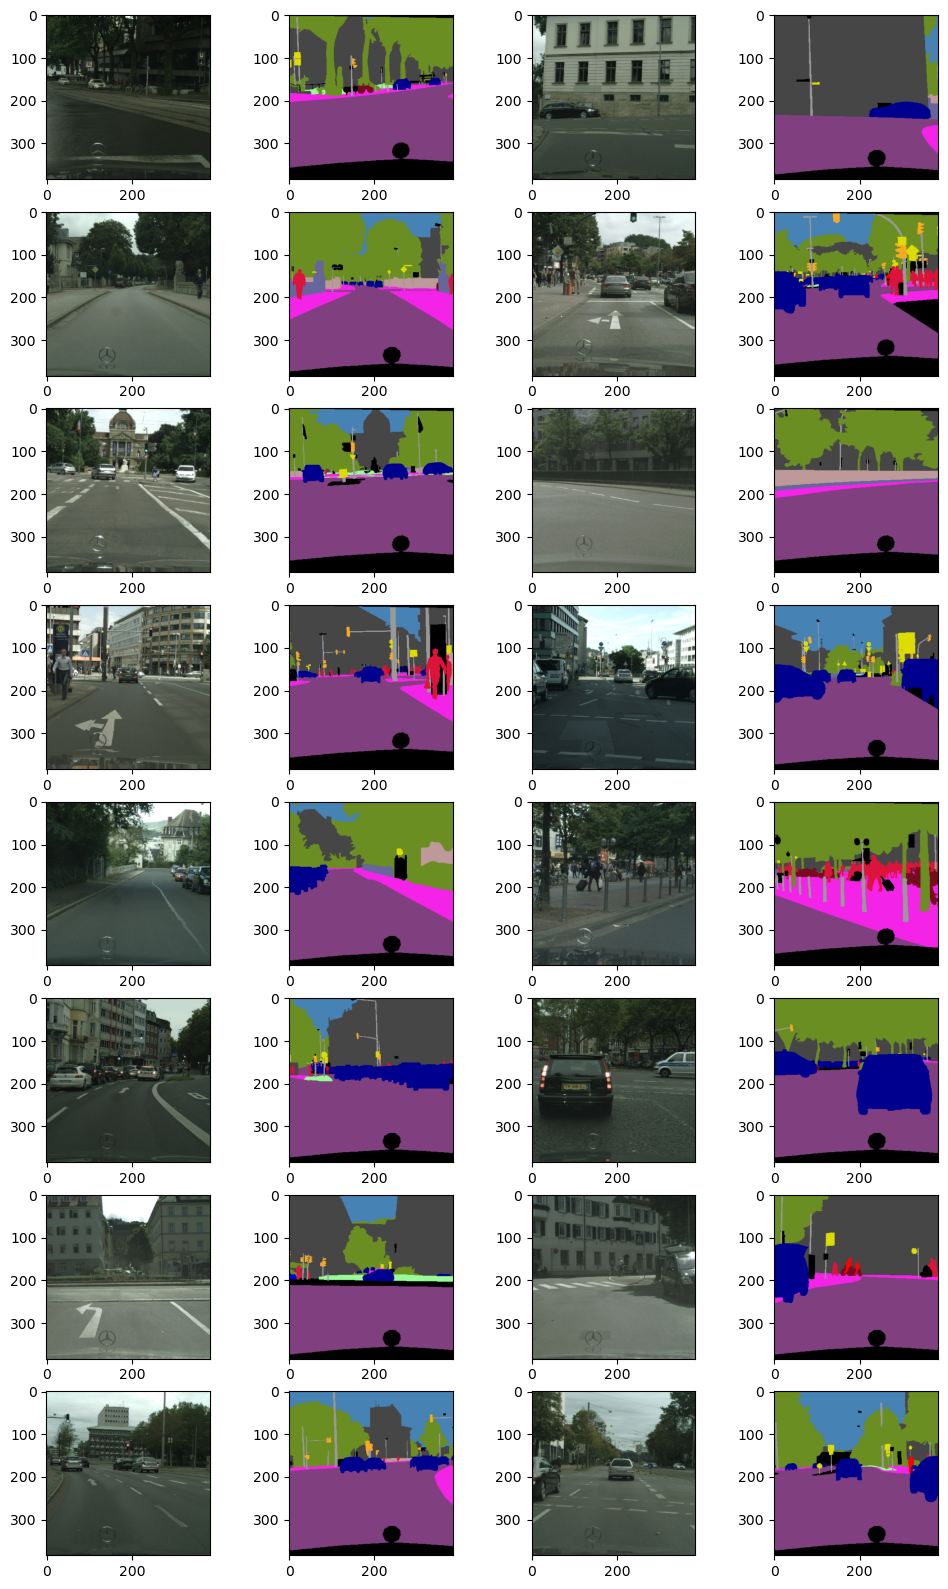

In [5]:
l=8
plt.figure(figsize=(12,20))
for e, i in enumerate(dataTrain):
    plt.subplot(l, 4, e*4+1)
    plt.imshow(i[0][0])
    plt.subplot(l, 4, e*4+2)
    plt.imshow(decode_one_hot_op(i[1][0], class_colors))
    plt.subplot(l, 4, e*4+3)
    plt.imshow(i[0][1])
    plt.subplot(l, 4, e*4+4)
    plt.imshow(decode_one_hot_op(i[1][1], class_colors))    
    if e >= l-1:
        break
print(i[0][0].shape), print(i[1][0].shape)

In [6]:
len(i), i[0].shape, i[1].shape

(2, TensorShape([4, 384, 384, 3]), TensorShape([4, 384, 384, 20]))